# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

In [53]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

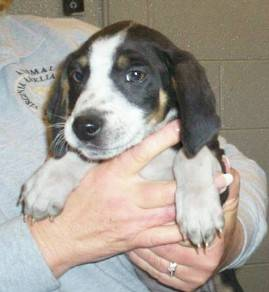

In [23]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/UFG/12/lia1/aula09/ds_treino/dogs/dog.10.jpg')

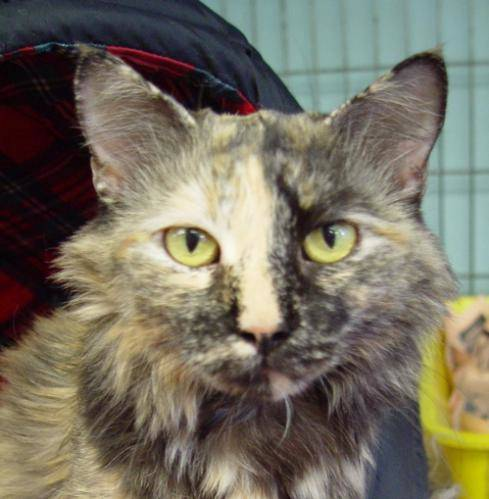

In [24]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/UFG/12/lia1/aula09/ds_treino/cats/cat.10.jpg')

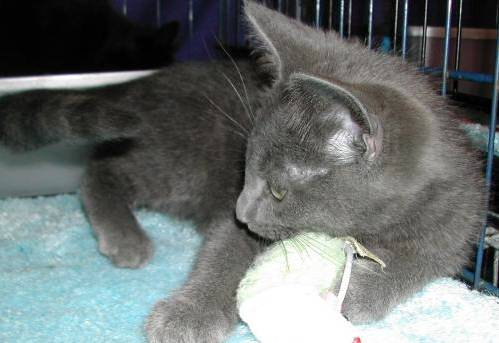

In [25]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/UFG/12/lia1/aula09/ds_teste/100.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.


In [1]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [11]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [39]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

# 32 features; formato 3x3; Imagens 256x256; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))  # input_shape alterado para (256, 256, 3)

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Terceira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [41]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/UFG/12/lia1/aula09/ds_treino',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

Found 1600 images belonging to 2 classes.


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

**Treinamento do Modelo**

In [58]:
%%time
# Executando o treinamento
classifier.fit(
    training_set,
    steps_per_epoch=625,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=25)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8100 - loss: 0.4301
Epoch 2/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.7784 - loss: 0.4664
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7910 - loss: 0.4484
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.8171 - loss: 0.4121
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8075 - loss: 0.4152
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.8065 - loss: 0.4272
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.8197 - loss: 0.4003
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.8295 - loss: 0.3683
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8470 - loss: 0.3632
Epoch 10/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.8459 - loss: 0.3646
Epoch 11/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8478 - loss: 0.3559
Epoch 12/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.8455 - loss: 0.3477
Epoch 13/25
625/625 ━━━━━━━━━━━━━━━━━━━━

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Previsão: Cachorro.
Acurácia: 99.95 %.


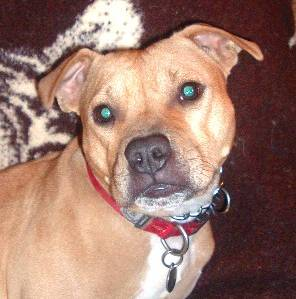

In [61]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_img_path = '/content/drive/MyDrive/UFG/12/lia1/aula09/ds_teste/2.jpg'
test_image = image.load_img(test_img_path, target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename=test_img_path)


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

##Validação


Para a validação, o dataset de teste usará 500 imagens de gatos e 500 imagens de cachorros separadas em duas pastas (cats/dogs).  
Obs: Nenhuma das imagens do treino foi utilizada.

In [66]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# pasta de testes com subpastas 'cats' e 'dogs'
test_img_path = '/content/drive/MyDrive/UFG/12/lia1/aula09/ds_teste-sep'

# Test data generator com mesmo preprocessamento do dataset de treino
test_datagen = ImageDataGenerator(rescale=1./255)

# Usando flow_from_directory para carregar e preprocessar imagens de teste
test_set = test_datagen.flow_from_directory(
    test_img_path,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False  # Não embaralha para validação
)

# Avalia o modelo no test_set
err_teste, acc_teste = classifier.evaluate(test_set, verbose=2)

print(f'Acurácia com dados de Teste: {acc_teste}')

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 - 5s - 338ms/step - accuracy: 0.7610 - loss: 0.6768
Acurácia com dados de Teste: 0.7609999775886536


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step


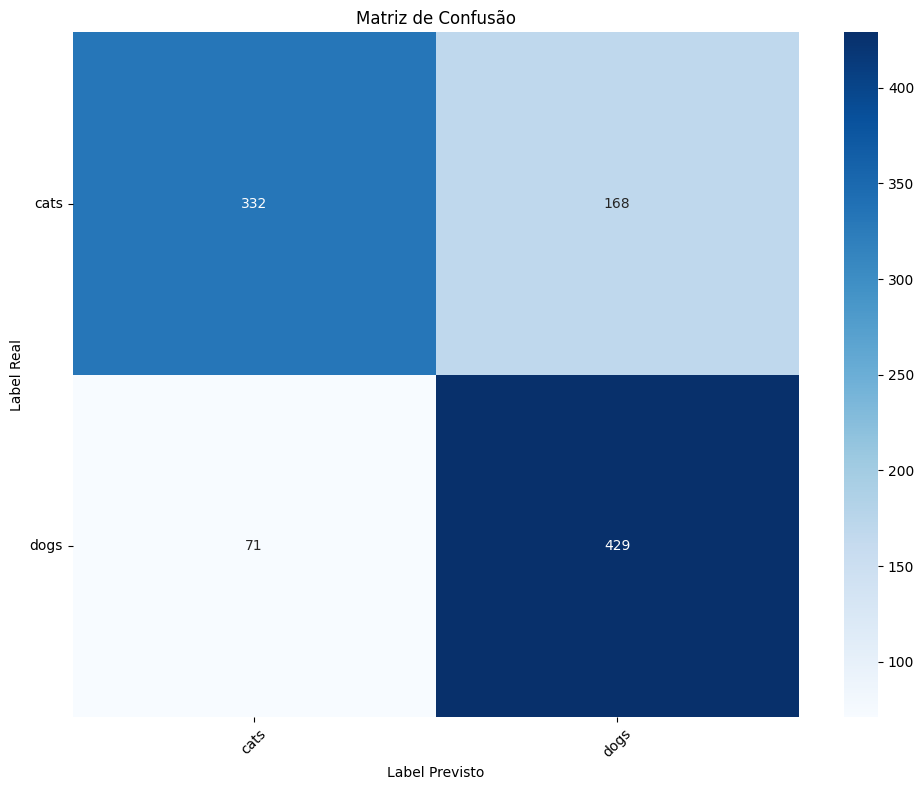

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

# Pega as true labels do test_set
y_true = test_set.classes

# Busca predições para imagens do conjunto de teste
y_pred = classifier.predict(test_set)
y_pred_classes = (y_pred > 0.5).astype(int)  # converte probabilidade em labels (0 ou 1)


# Pega o nome da classes
nomes_classes = list(test_set.class_indices.keys())

# Gera a matriz de confusao
cm = confusion_matrix(y_true, y_pred_classes)

# Plota a matriz de confusao
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nomes_classes,
            yticklabels=nomes_classes)
plt.title('Matriz de Confusão')
plt.xlabel('Label Previsto')
plt.ylabel('Label Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Melhorias adicionais para este modelo:**

* [X] Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
* [X] aumentar o redimensionamento da imagem de 64x64 para 256x256.
* [X] Aumentar o tamanho do lote de 32 para 64.
* [X] Alterar a arquitetura da rede incluindo mais uma camada convolucional.
* [ ] Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
* [ ] Experimentar outros algoritmos de otimização.